<a href="https://colab.research.google.com/github/Reben80/Data110-22016/blob/main/Week_4_Python(Fall2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating and Customizing Bar Charts with Matplotlib

In [36]:

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.style.use("ggplot")  # Sets the style for the plots


### Basic Bar Chart from List

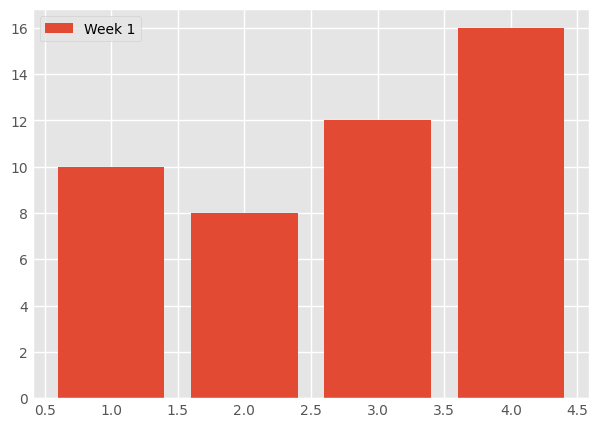

In [37]:

x = [1, 2, 3, 4]
y = [10, 8, 12, 16]

plt.bar(x, y, label='Week 1')
plt.legend()
plt.show()


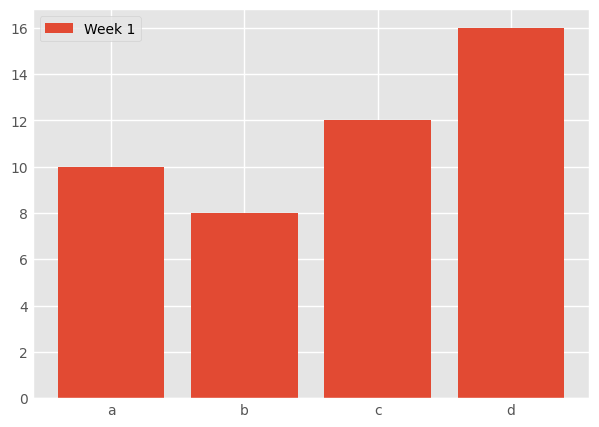

In [38]:

x = ['a','b','c','d']
y = [10, 8, 12, 16]
plt.bar(x, y, label='Week 1')
plt.legend()
plt.show()

### Comparing Two Sets of Data

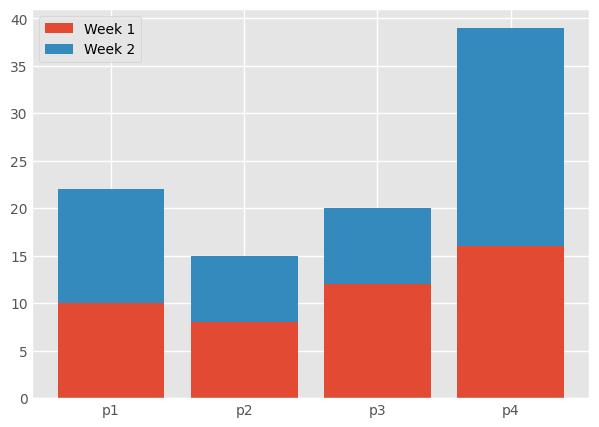

In [39]:

x = ['p1', 'p2', 'p3', 'p4']
y = [10, 8, 12, 16]
z = [12, 7, 8, 23]
plt.bar(x, y, label='Week 1')
plt.bar(x, z, label='Week 2', bottom=y)  # Stacks z on top of y
plt.legend()
plt.show()


### Adjusting Bar Positions

[0 1 2]


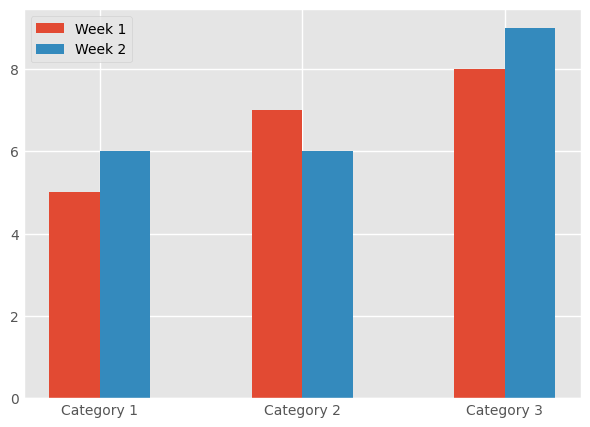

In [40]:
import numpy as np

# Sample data
x = ['Category 1', 'Category 2', 'Category 3']
y = [5, 7, 8]  # Data for Week 1
z = [6, 6, 9]  # Data for Week 2

# Generate indexes for the x-axis (equal to the length of 'x' categories)
x_indexes = np.arange(len(x))
print(x_indexes)
# Plot the first set of bars for Week 1, shifting slightly to the left for proper alignment
plt.bar(x_indexes - 0.125, y, width=0.25, label='Week 1')

# Plot the second set of bars for Week 2, shifting slightly to the right for proper alignment
plt.bar(x_indexes + 0.125, z, width=0.25, label='Week 2')

# Customize the x-axis ticks by setting them to the categories in 'x'
plt.xticks(ticks=x_indexes, labels=x)

# Add a legend to distinguish between Week 1 and Week 2
plt.legend()

# Display the plot
plt.show()


### How Do We Ensure Grouped Bars Are Side by Side?

The key to ensuring that the **grouped bars** are exactly side by side lies in the **positions** of the bars and the **width** specified. Let’s break it down:

#### 1. `x_indexes`:
- This array contains the positions where each group of bars (for the different categories) will be placed on the x-axis.
- For example, if `x = ['Category 1', 'Category 2', 'Category 3']`, then `x_indexes = [0, 1, 2]`.

#### 2. **Bar Shifting**:
- For **grouped bars**, you need to shift the bars slightly to the left and right from their central position (`x_indexes`) so that they don't overlap and appear side by side.

#### 3. **Width of Bars**:
- The **width** of each bar is set to `0.25` (this can be adjusted).
- In order for the bars to be side by side, the amount of the shift for each bar needs to match **half** the width of the bars.

### The Exact Positioning:

- `plt.bar(x_indexes - 0.125, y, width=0.25, label='Week 1')`:
  - The `x_indexes - 0.125` shifts the **Week 1** bars slightly to the **left**. The amount of shift is **half the bar width** (`0.25 / 2 = 0.125`), so the left bar starts right in the middle of where the grouped bars will be.
  
- `plt.bar(x_indexes + 0.125, z, width=0.25, label='Week 2')`:
  - Similarly, `x_indexes + 0.125` shifts the **Week 2** bars slightly to the **right**, by the same amount (`0.125`), placing them side by side with the **Week 1** bars.

### Why Does This Work?

Because the total shift (`0.125` to the left and `0.125` to the right) equals the full width of one bar (`0.25`), the bars end up exactly next to each other without overlap or gaps.

### Example:

For `x_indexes = [0, 1, 2]`:

- **Week 1** bars will be centered at `[-0.125, 0.875, 1.875]`.
- **Week 2** bars will be centered at `[0.125, 1.125, 2.125]`.

This arrangement ensures that both bars for each category (Week 1 and Week 2) align perfectly side by side without overlapping or gaps.


### Bar Graph from Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            140 non-null    object 
 1   Region                             140 non-null    object 
 2   Rank                               140 non-null    int64  
 3   HappinessScore                     140 non-null    float64
 4   Life Ladder                        140 non-null    float64
 5   Log GDP per capita                 133 non-null    float64
 6   Social support                     139 non-null    float64
 7   Healthy life expectancy at birth   140 non-null    float64
 8   Freedom to make life choices       139 non-null    float64
 9   Generosity                         132 non-null    float64
 10  Perceptions of corruption          128 non-null    float64
 11  Positive affect                    139 non-null    float64

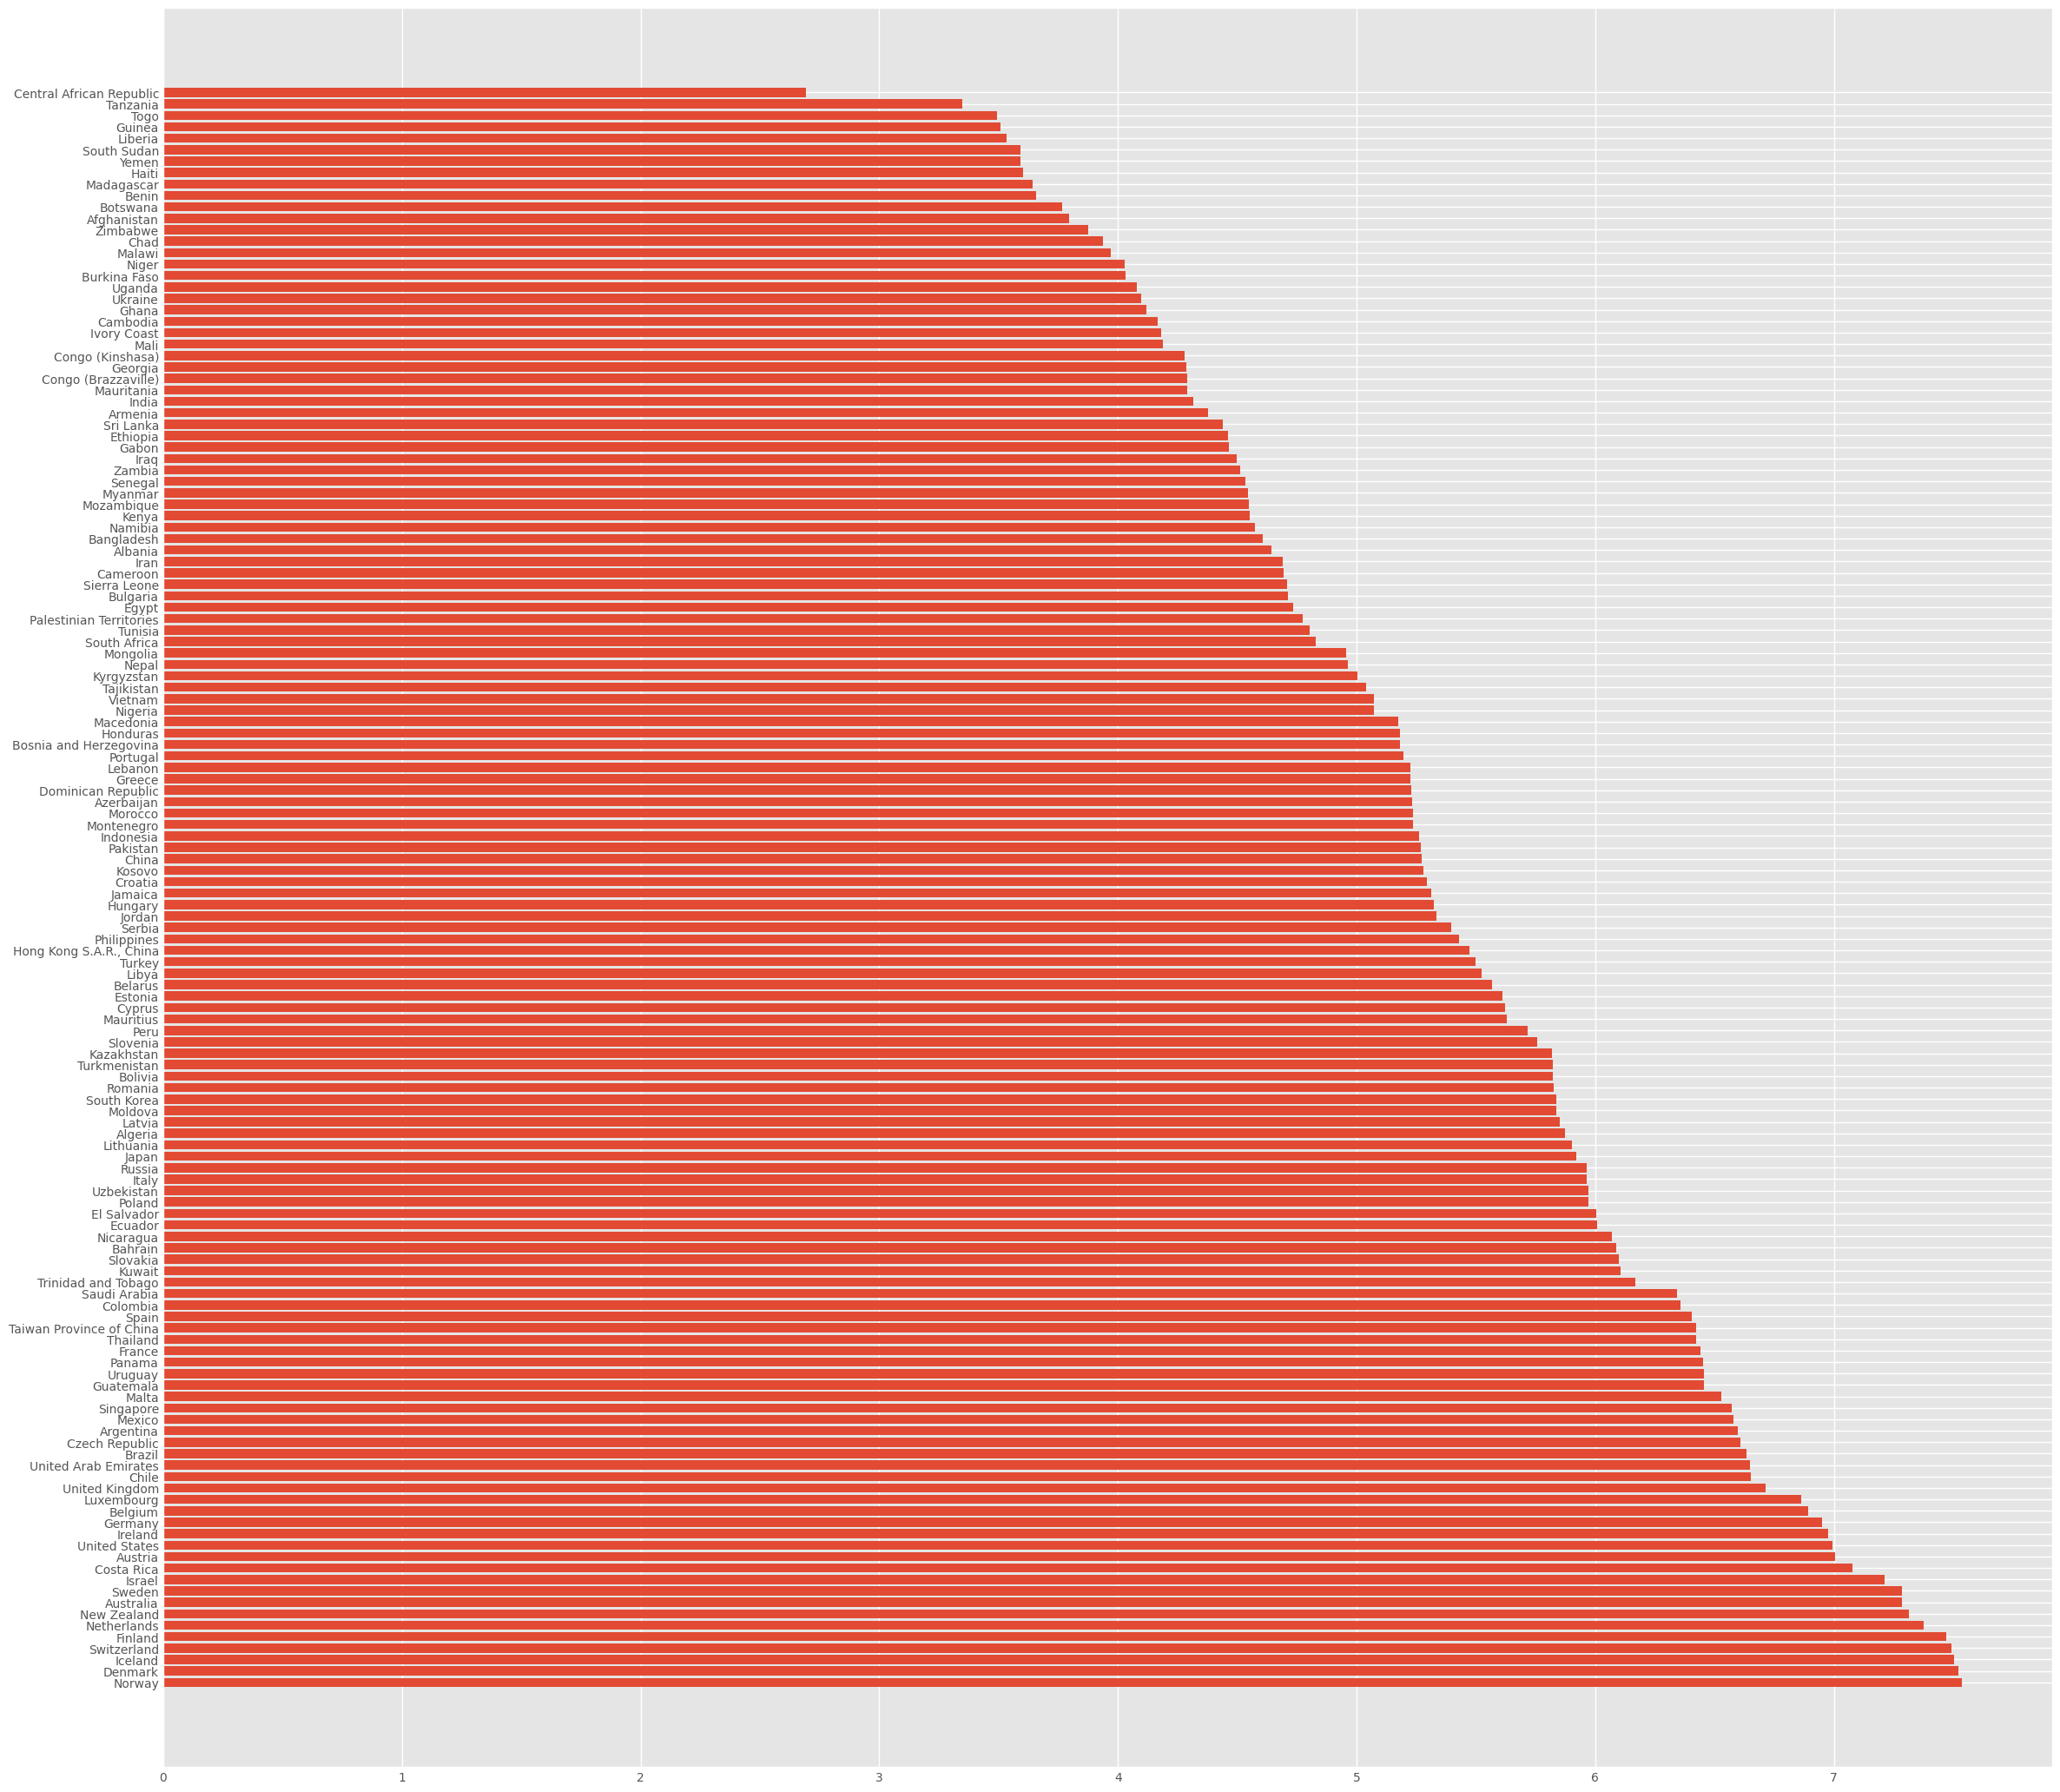

In [41]:

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Reben80/Data110-22016/refs/heads/main/dataset/happiness_2017.csv')
df.head()  # Shows the first few rows
df.info()  # Provides information about the dataframe

# Basic visualization
plt.figure(figsize=(25, 25))
plt.barh(df['Country'], df['HappinessScore'])
plt.show()


### Enhancing the Visualization

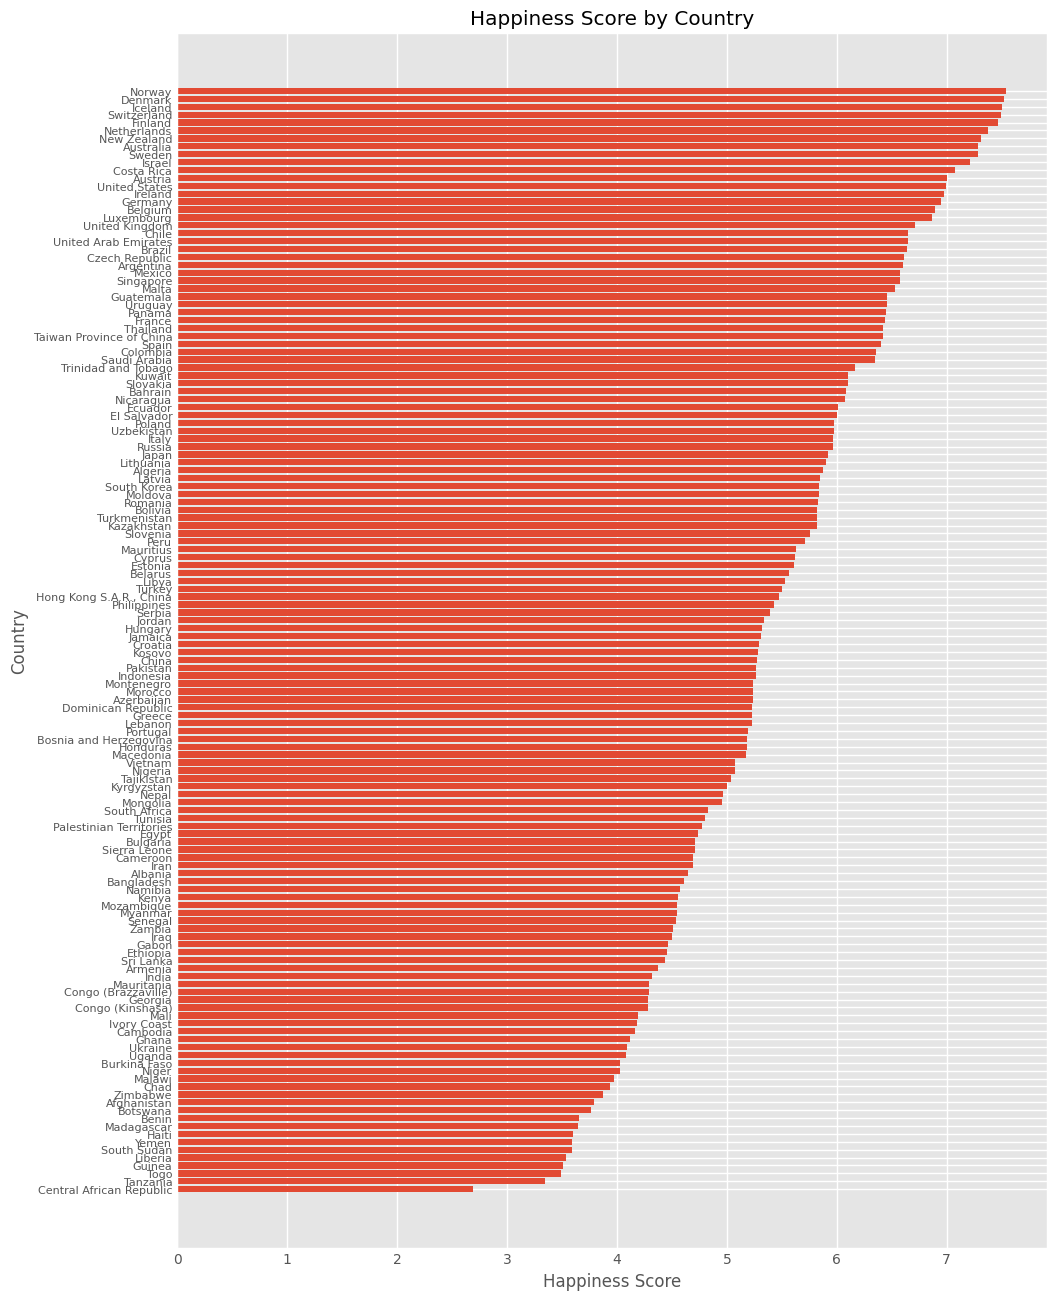

In [45]:
df_sorted = df.sort_values(by='HappinessScore', ascending=True)
plt.figure(figsize=(10, 15))  # Adjusted figure height
plt.barh(df_sorted['Country'], df_sorted['HappinessScore']) # Removed extra space in column name
plt.xlabel('Happiness Score')  # Added space for clarity
plt.ylabel('Country')
plt.title('Happiness Score by Country')

# Set y-axis tick label size
ax = plt.gca()
ax.tick_params(axis='y', labelsize=8)

plt.show()

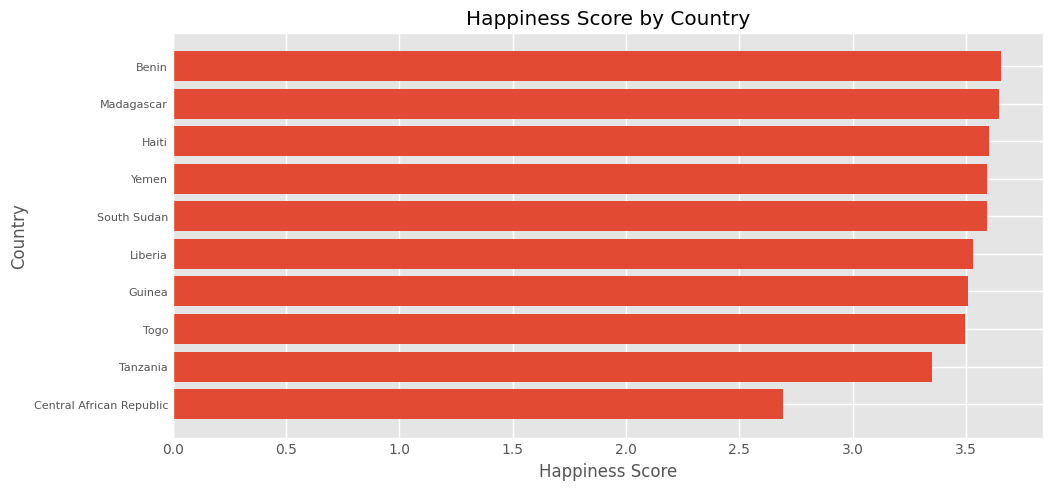

In [46]:
# Get only the first 10 rows from the sorted DataFrame
df_top_10 = df_sorted.head(10)
plt.figure(figsize=(10, 5))

# Plot the first 10 countries
plt.barh(df_top_10['Country'], df_top_10['HappinessScore'])

plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score by Country')

# Customize axis tick labels
ax = plt.gca()
ax.tick_params(axis='y', labelsize=8)

plt.show()


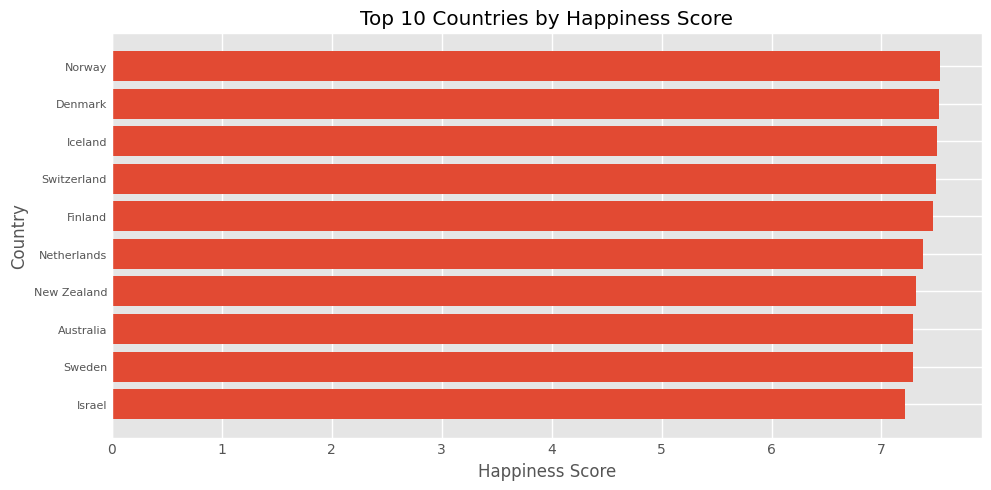

In [47]:
# Sort and directly slice the top 10 highest Happiness Scores using .tail
plt.figure(figsize=(10, 5))

# Plot only the top 10 rows (highest values)
plt.barh(df_sorted.tail(10)['Country'], df_sorted.tail(10)['HappinessScore'])

plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Countries by Happiness Score')

# Customize axis tick labels
ax = plt.gca()
ax.tick_params(axis='y', labelsize=8)

plt.show()


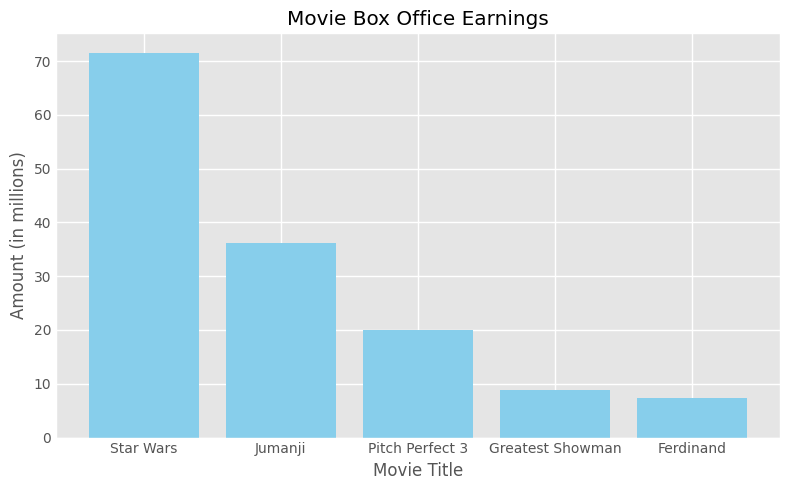

In [48]:


# Data from the table
titles = ['Star Wars', 'Jumanji', 'Pitch Perfect 3', 'Greatest Showman', 'Ferdinand']
amounts = [71.57, 36.17, 19.93, 8.81, 7.32]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(titles, amounts, color='skyblue')

# Add titles and labels
plt.title('Movie Box Office Earnings')
plt.xlabel('Movie Title')
plt.ylabel('Amount (in millions)')

# Show the plot
plt.tight_layout()
plt.show()


Lets add horizonal grid only to the graph


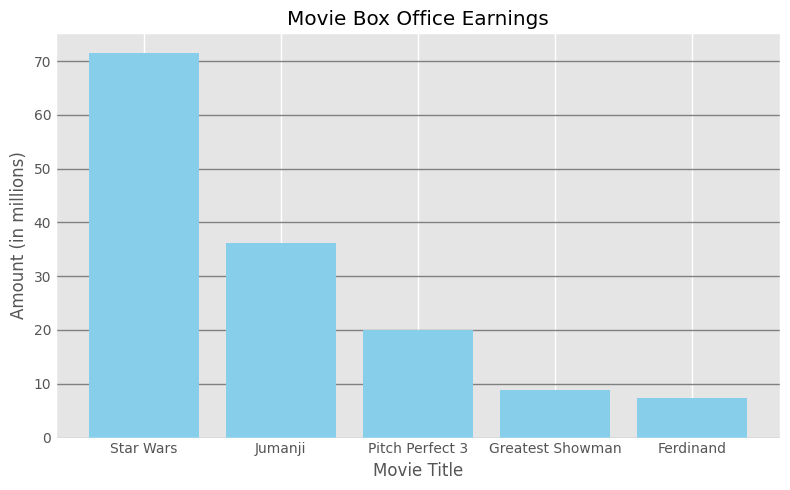

In [49]:

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(titles, amounts, color='skyblue')

# Add titles and labels
plt.title('Movie Box Office Earnings')
plt.xlabel('Movie Title')
plt.ylabel('Amount (in millions)')

# Add only horizontal grid lines with a dashed style
plt.grid(axis='y', linestyle='-', color='gray')

# Show the plot
plt.tight_layout()
plt.show()


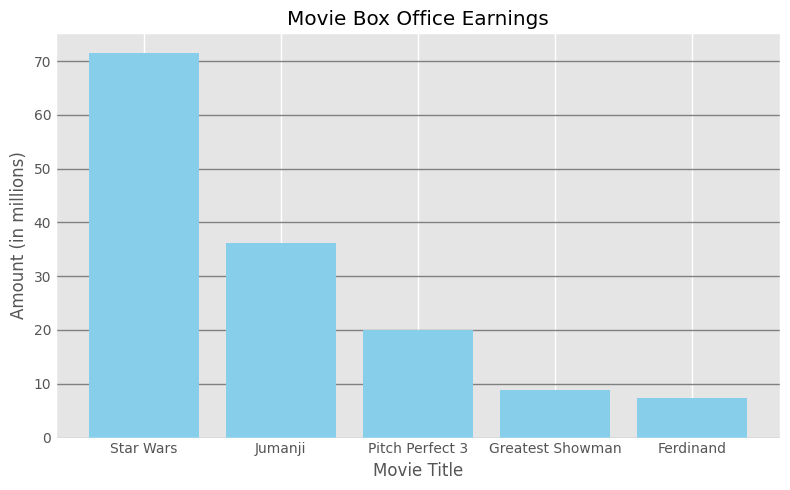

In [50]:


# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(titles, amounts, color='skyblue', zorder=2)  # Darker blue bars with zorder=3

# Add titles and labels
plt.title('Movie Box Office Earnings')
plt.xlabel('Movie Title')
plt.ylabel('Amount (in millions)')

# Add only horizontal grid lines behind the bars
plt.grid(axis='y', linestyle='-', color='gray', zorder=0)

# Show the plot
plt.tight_layout()
plt.show()


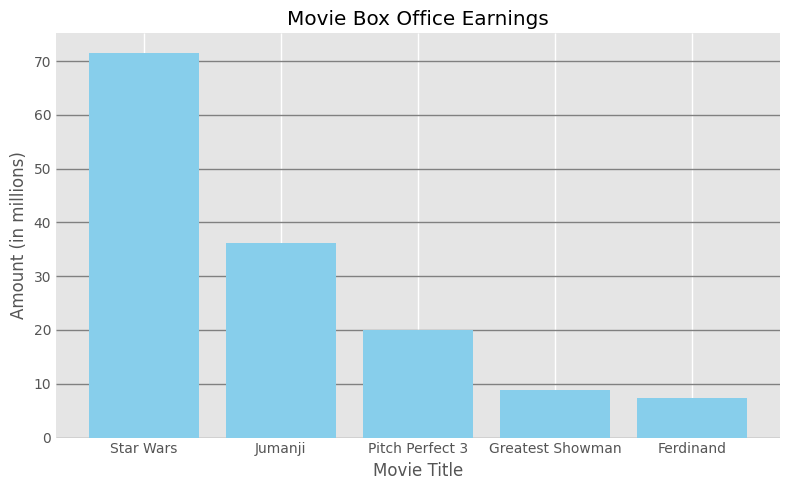

In [51]:

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(titles, amounts, color='skyblue', zorder=2)  # Darker blue bars with zorder=1

# Add titles and labels
plt.title('Movie Box Office Earnings')
plt.xlabel('Movie Title')
plt.ylabel('Amount (in millions)')

# Remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add only horizontal grid lines behind the bars
plt.grid(axis='y', linestyle='-', color='gray', zorder=0)

# Show the plot
plt.tight_layout()
plt.show()


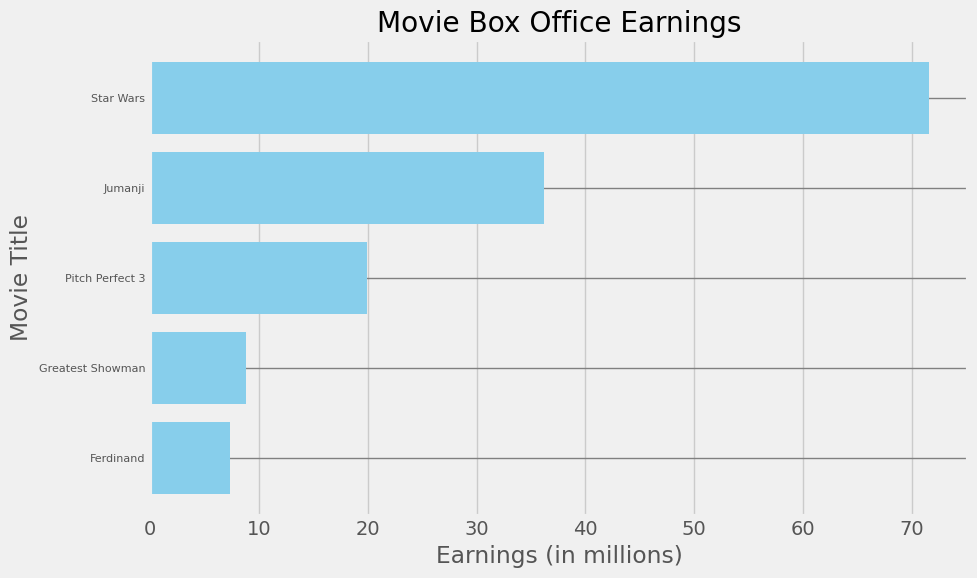

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the Dictionary
data = {'Movie': ['Star Wars', 'Jumanji', 'Pitch Perfect 3', 'Greatest Showman', 'Ferdinand'],
        'Earnings': [71.57, 36.17, 19.93, 8.81, 7.32]}

# Create the DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by earnings in ascending or descending order
df_sorted = df.sort_values(by='Earnings', ascending=True)

# Plot the horizontal bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Movie'], df_sorted['Earnings'], color='skyblue',zorder=2)

# Add titles and labels
plt.xlabel('Earnings (in millions)')
plt.ylabel('Movie Title')
plt.title('Movie Box Office Earnings')

# Customize tick size and other properties
ax = plt.gca()
ax.tick_params(axis='y', labelsize=8)  # Control y-axis tick label size
plt.grid(axis='y', linestyle='-', color='gray', zorder=0)
# Show the plot
plt.tight_layout()
plt.show()


To control the width between the bars in a bar chart, you can adjust the width parameter in the `plt.bar()` function. The default value is `0.8`, which means the bars take up `80%` of the space allocated for each category. Reducing this value will increase the space between bars, and increasing it will decrease the space between them.

Here’s how you can adjust the width between the bars:

Note:-
`ax = plt.gca()` stands for "get current axis." It is a function in matplotlib that returns the current Axes object (which is the plot's area or frame). This allows you to manipulate various properties of the plot after it has been created, such as hiding spines, setting tick parameters, or customizing the labels.

In the previous code, we used `ax = plt.gca()` to get the current axis and then modify its appearance by hiding the spines (borders around the plot). After getting the ax object, we accessed its spines using ax.spines to control the visibility of each side of the plot.

Here's a breakdown:

- `plt.gca()` gets the current Axes object, which is a part of the figure where the data is plotted.
- `ax.spines['top']`.set_visible(False) hides the top border (spine) of the plot.
In short, plt.gca() is useful when you need to access and modify specific properties of the current plot.

# Horizontal bar graph

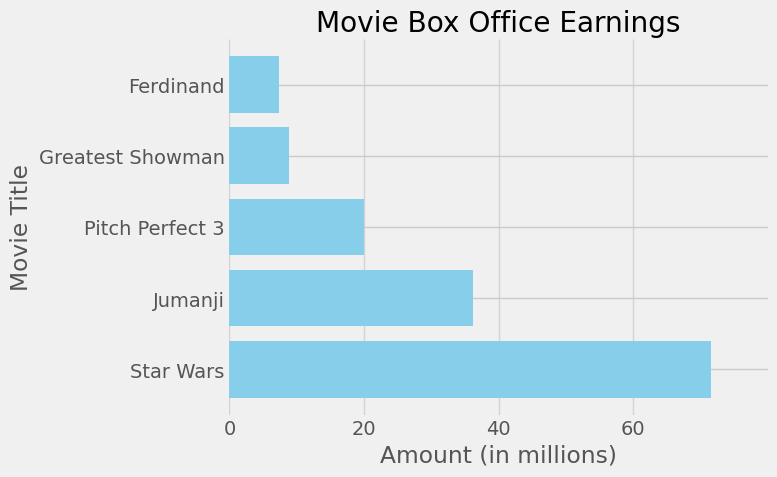

In [54]:

# Create a horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(titles, amounts, color='skyblue', zorder=3)  # Horizontal bars with zorder=1

# Add titles and labels
plt.title('Movie Box Office Earnings')
plt.xlabel('Amount (in millions)')
plt.ylabel('Movie Title')

# Get the current axis using gca()
ax = plt.gca()

# Set x-axis limits to ensure 0 is included (since it's a horizontal bar chart, the x-axis shows the amounts)
ax.set_xlim(0, 80)

# Set x-axis ticks to appear at 0, 20, 40, and 60
plt.xticks([0, 20, 40, 60])

# Remove specific spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add horizontal grid lines behind the bars (affects vertical grid for horizontal bars)
plt.grid(axis='x', linestyle='-', color='#d3d3d3', zorder=0)

# Show the plot
plt.tight_layout()
plt.show()


> **Note:** Sometimes it’s more useful to create a dataframe from a list. This makes sorting easier since you can leverage the full power of Pandas.


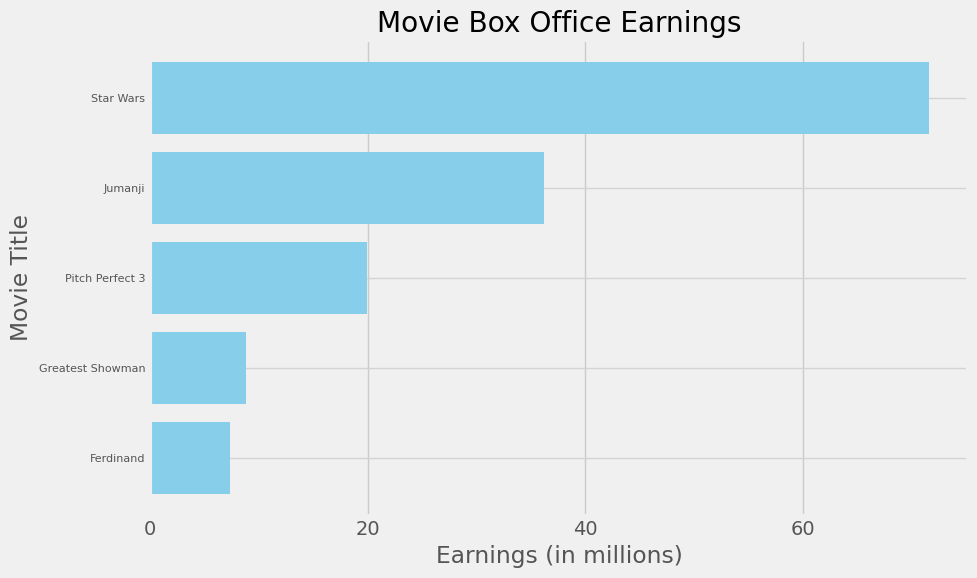

In [60]:

# Create the DataFrame
data = {'Movie': ['Star Wars', 'Jumanji', 'Pitch Perfect 3', 'Greatest Showman', 'Ferdinand'],
        'Earnings': [71.57, 36.17, 19.93, 8.81, 7.32]}
dm = pd.DataFrame(data)

# Sort the DataFrame by earnings in ascending or descending order
dm_sorted = dm.sort_values(by='Earnings', ascending=True)

# Plot the horizontal bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.barh(dm_sorted['Movie'], dm_sorted['Earnings'], color='skyblue')

# Add titles and labels
plt.xlabel('Earnings (in millions)')
plt.ylabel('Movie Title')
plt.title('Movie Box Office Earnings')

# Set x-axis ticks to appear at 0, 20, 40, and 60
plt.xticks([0, 20, 40, 60])

#Grid
plt.grid(axis='y', linestyle='-', color='#d3d3d3', zorder=0)

# Customize tick size and other properties
ax = plt.gca()
ax.tick_params(axis='y', labelsize=8)  # Control y-axis tick label size

# Show the plot
plt.tight_layout()
plt.show()


Finally, lets add different color to each categories

<BarContainer object of 5 artists>

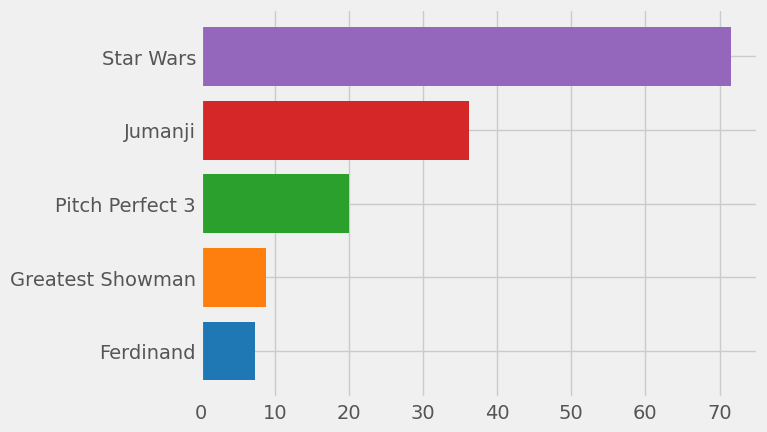

In [63]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.barh(dm_sorted['Movie'], dm_sorted['Earnings'], color=colors)
